#### Задание (2/2)
- [x] Найти в открытых источниках или составить самостоятельно таблицу среднего дохода (PPP) в зависимости от страны
- [x] Построить график корреляции между средним доходом (PPP) и ценой подписки 

#### Вопросы (7/7)
- [x] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны.
- [x] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента
- [x] Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?
- [x] Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?
- [x] Какой процент среднего дохода россиянина будет составлять подписка Netflix?
- [x] На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)
- [x] В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

#### Ограничения (5/5)
- [x] Данные, используемые в ноутбуке с решением, должны подтягиваться через url c удаленного источника (википедии, google sheets, etc)
- [x] Нельзя использовать циклы for, while для работы с данными. Используйте инструменты Pandas
- [x] Должны присутствовать методы df.apply, pd.merge, pd.concat
- [x] В приведенной статье есть готовые выводы, их нельзя использовать.
- [x] Решение оформить в виде репозитория на github.com


Веса:
- Задание - 2  
- Вопросы - 7  
- Ограничения - 3  


Формула оценки: =(2/2 * 2 + 7/7 * 7 + 5/5 * 3)/ (2 + 7 + 3) * 10  
**Оценка**: 10/10

# Pandas Workshop: аналитика по Netflix

Представьте что вы аналитик стримингового сервиса, который хочет выйти на глобальный рынок. Самый большой конкурент, на которого вы ориентируетесь, это, конечно же, Netflix.

Давайте посмотрим на то как себя чувствует конкурент на разных рынках. Возможно наша компания легче зайдет на один из них и заработает миллиарды долларов. Ну или конкретно мы, благодаря этому исследованию, сможем начать смотреть Ведьмака подешевле, используя VPN. 

## 1. Найти в открытых источниках или составить самостоятельно таблицу среднего дохода (PPP) в зависимости от страны

### Загрузка данных

Нам потребуются данные о стоимости подписки на Netflix и средний доход в разных странах. Я заранее скачала и загрузила данные в свой репозиторий, чтобы всегда иметь возможность обратиться к ним, но в этот ноутбук они подтягиваются по URL.  
Источники данных:
- Стоимость подписки: [kaggle](https://www.kaggle.com/prasertk/netflix-subscription-price-in-different-countries?select=Netflix+subscription+fee+Dec-2021.csv)
- Средняя зарплата: [worldpopulationreview.com](https://worldpopulationreview.com/country-rankings/median-income-by-country) 
- Валюта: [Github](https://gist.github.com/HarishChaudhari/4680482)
- Континент: [statisticstimes.com](https://statisticstimes.com/geography/countries-by-continents.php)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  

In [2]:
prices = pd.read_csv('https://raw.githubusercontent.com/Daeronel/netflix-prices/main/prices_for_countries.csv')
print(prices.shape)
prices.head(3)

(65, 8)


,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32


In [3]:
salaries = pd.read_csv('https://raw.githubusercontent.com/Daeronel/netflix-prices/main/salaries.csv')
print(salaries.shape)
salaries.head(3)

(162, 5)


,country,medianIncome,meanIncome,gdpPerCapitaPPP,pop2021
0,Luxembourg,26321,31376,124590,634.814
1,United Arab Emirates,24292,27017,70089,9991.089
2,Norway,22684,25272,70005,5465.630


Так как стоимость подписки указана в месяц, то и зарплату пересчитаем в месяц.

In [4]:
salaries = salaries.drop(columns = ['medianIncome', 'gdpPerCapitaPPP', 'pop2021' ])
salaries['meanIncome'] = round(salaries['meanIncome']/12, 2)

In [5]:
currency = pd.read_csv('https://raw.githubusercontent.com/Daeronel/netflix-prices/main/currency.csv')
print(currency.shape)
currency.head(3)

(250, 4)


,Country,CountryCode,Currency,Code
0,New Zealand,NZ,New Zealand Dollars,NZD
1,Cook Islands,CK,New Zealand Dollars,NZD
2,Niue,NU,New Zealand Dollars,NZD


In [6]:
currency['CountryCode'] = currency['CountryCode'].apply(lambda x: str(x).lower())
currency = currency.rename(columns = {'Country': 'Country_curr'})

In [7]:
continents = pd.read_csv('https://raw.githubusercontent.com/Daeronel/netflix-prices/main/continents.csv')
print(continents.shape)
continents.head(3)

(249, 8)


,Unnamed: 0,No,Country or Area,ISO-alpha3 Code,M49 Code,Region 1,Region 2,Continent
0,0,1,Afghanistan,AFG,4,Southern Asia,NaN,Asia
1,1,2,Åland Islands,ALA,248,Northern Europe,NaN,Europe
2,2,3,Albania,ALB,8,Southern Europe,NaN,Europe


In [8]:
continents['ISO-alpha3 Code'] = continents['ISO-alpha3 Code'].apply(lambda x: str(x).lower())
continents = continents.drop(columns = ['Unnamed: 0', 'No', 'M49 Code', 'Region 1', 'Region 2'])

Объединим данные:

In [9]:
df = (prices
      .merge(salaries, left_on = 'Country', right_on = 'country', how = 'left')
      .merge(currency, left_on = 'Country_code', right_on = 'CountryCode', how = 'left')
      .merge(continents, left_on = 'Country', right_on = 'Country or Area', how = 'left')
      .set_index('Country')
     )
df.head(3)

,Country_code,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country,meanIncome,Country_curr,CountryCode,Currency,Code,Country or Area,ISO-alpha3 Code,Continent
Country,,,,,,,,,,,,,,,,
Argentina,ar,4760,3154,1606,3.74,6.30,9.26,Argentina,577.92,Argentina,ar,Peso,ARS,Argentina,arg,South America
Australia,au,6114,4050,2064,7.84,12.12,16.39,Australia,1777.42,Australian,au,Australian Dollars,AUD,Australia,aus,Oceania
Austria,at,5640,3779,1861,9.03,14.67,20.32,Austria,1726.50,Austria,at,Euros,EUR,Austria,aut,Europe


In [10]:
df.loc[df['meanIncome'].isnull()]

,Country_code,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country,meanIncome,Country_curr,CountryCode,Currency,Code,Country or Area,ISO-alpha3 Code,Continent
Country,,,,,,,,,,,,,,,,
Czechia,cz,7325,5234,2091,8.83,11.49,14.15,NaN,NaN,Czech Republic,cz,Koruna,CZK,Czechia,cze,Europe
Gibraltar,gi,6167,4079,2088,9.03,14.67,20.32,NaN,NaN,Gibraltar,gi,Gibraltar Pound,GIP,Gibraltar,gib,Europe
Hong Kong,hk,4746,2883,1863,8.08,10.00,11.93,NaN,NaN,Hong Kong,hk,HKD,HKD,NaN,NaN,NaN
Indonesia,id,3887,2449,1438,8.36,10.66,12.96,NaN,NaN,Indonesia,id,Indonesian Rupiah,IDR,Indonesia,idn,Asia
Liechtenstein,li,3048,1712,1336,12.88,20.46,26.96,NaN,NaN,Liechtenstein,li,Swiss Franc,CHF,Liechtenstein,lie,Europe
Monaco,mc,5804,3806,1998,9.03,13.54,18.06,NaN,NaN,Monaco,mc,Euros,EUR,Monaco,mco,Europe
New Zealand,nz,6084,4003,2081,8.80,12.53,16.94,NaN,NaN,New Zealand,nz,New Zealand Dollars,NZD,New Zealand,nzl,Oceania
San Marino,sm,2310,1937,373,9.03,14.67,20.32,NaN,NaN,San Marino,sm,Euros,EUR,San Marino,smr,Europe
Singapore,sg,6303,4109,2194,9.51,12.81,16.11,NaN,NaN,Singapore,sg,Dollar,SGD,Singapore,sgp,Asia


Видим пропуски: скорее всего не совпадают названия в датасетах или пропущены значения. Заполним их вручную. 

In [11]:
df['meanIncome']['Czechia'] = salaries.loc[salaries.country == 'Czech Republic']['meanIncome'].values[0]

Остальные не нашлись в используемом датасете. Для чистоты исследования лучше их просто удалить - в разных источниках средний доход рассчитывается по разному, поэтому числа невозможно сопоставить между собой. Если взять значения из других источников, они могут быть сильно больше или меньше, что значительно исказит результаты.

In [12]:
df = df.loc[df['meanIncome'].notna()]

In [13]:
df.loc[df['Continent'].isnull()]

,Country_code,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country,meanIncome,Country_curr,CountryCode,Currency,Code,Country or Area,ISO-alpha3 Code,Continent
Country,,,,,,,,,,,,,,,,
Bolivia,bo,4991,3155,1836,7.99,10.99,13.99,Bolivia,398.92,Bolivia,bo,Boliviano,BOB,NaN,NaN,NaN
Moldova,md,3937,2473,1464,9.03,11.29,13.54,Moldova,299.17,Moldova Republic of,md,Leu,MDL,NaN,NaN,NaN
Russia,ru,5711,3624,2087,8.13,10.84,13.56,Russia,606.25,Russian Federation,ru,Ruble,RUB,NaN,NaN,NaN
South Korea,kr,5195,3334,1861,8.07,11.47,14.45,South Korea,1193.00,Korea South,kr,Won,KRW,NaN,NaN,NaN
Taiwan,tw,5105,3134,1971,9.74,11.90,14.07,Taiwan,1362.92,Taiwan,tw,Dollar,TWD,NaN,NaN,NaN
United Kingdom,gb,6643,4551,2092,7.91,13.20,18.48,United Kingdom,1511.08,United Kingdom,gb,Sterling,GBP,NaN,NaN,NaN
United States,us,5818,3826,1992,8.99,13.99,17.99,United States,2111.00,United States,us,USD,USD,NaN,NaN,NaN
Venezuela,ve,4797,3154,1643,7.99,10.99,13.99,Venezuela,311.75,Venezuela,ve,Bolivar,VEF,NaN,NaN,NaN


In [14]:
df['Continent']['Bolivia'] = continents.loc[continents['Country or Area'] == 'Bolivia (Plurinational State of)']['Continent'].values[0]
df['Continent']['Moldova'] = continents.loc[continents['Country or Area'] == 'Republic of Moldova']['Continent'].values[0]
df['Continent']['Russia'] = continents.loc[continents['Country or Area'] == 'Russian Federation']['Continent'].values[0]
df['Continent']['South Korea'] = continents.loc[continents['Country or Area'] == 'Republic of Korea']['Continent'].values[0]
df['Continent']['Taiwan'] = continents.loc[continents['Country or Area'] == 'China']['Continent'].values[0]
df['Continent']['United Kingdom'] = continents.loc[continents['Country or Area'] == 'United Kingdom of Great Britain and Northern Ireland']['Continent'].values[0]
df['Continent']['United States'] = continents.loc[continents['Country or Area'] == 'United States of America']['Continent'].values[0]
df['Continent']['Venezuela'] = continents.loc[continents['Country or Area'] == 'Venezuela (Bolivarian Republic of)']['Continent'].values[0]

In [15]:
df = (df
      .loc[df['meanIncome'].notna()]
      .drop(columns = ['country', 'Country_code', 'Country_curr', 'ISO-alpha3 Code', 'Country or Area']))

In [16]:
df.columns = [
    'Total',
    'TV Shows',
    'Movies',
    'Basic price, $',
    'Standard price, $', 
    'Premium price, $',
    'Mean income, $',
    'CountryCode',
    'Currency',
    'Currency code',
    'Continent'
]

In [17]:
df.head()

,Total,TV Shows,Movies,"Basic price, $","Standard price, $","Premium price, $","Mean income, $",CountryCode,Currency,Currency code,Continent
Country,,,,,,,,,,,
Argentina,4760,3154,1606,3.74,6.30,9.26,577.92,ar,Peso,ARS,South America
Australia,6114,4050,2064,7.84,12.12,16.39,1777.42,au,Australian Dollars,AUD,Oceania
Austria,5640,3779,1861,9.03,14.67,20.32,1726.50,at,Euros,EUR,Europe
Belgium,4990,3374,1616,10.16,15.24,20.32,1493.08,be,Euros,EUR,Europe
Bolivia,4991,3155,1836,7.99,10.99,13.99,398.92,bo,Boliviano,BOB,South America


In [18]:
df.shape

(57, 11)

Осталось 57 из 65 стран: не очень хорошо, но все еще большая выборка.

## 2. Построить график корреляции между средним доходом (PPP) и ценой подписки

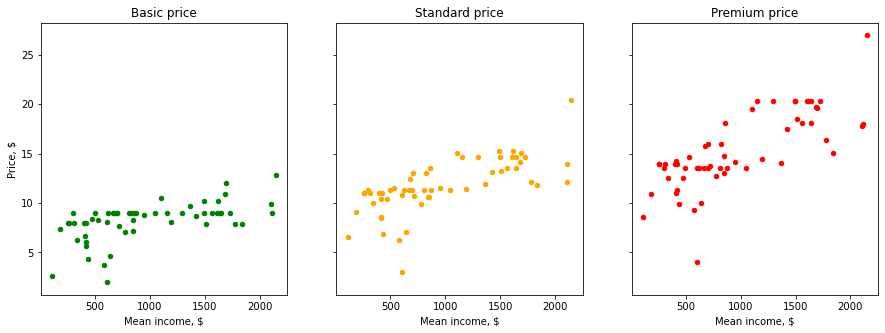

In [19]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))

df.plot.scatter(x = 'Mean income, $', y = 'Basic price, $', ylabel = 'Price, $', title = 'Basic price', ax = ax[0], color = 'green')
df.plot.scatter(x = 'Mean income, $', y = 'Standard price, $', title = 'Standard price', ax = ax[1], color = 'orange')
df.plot.scatter(x = 'Mean income, $', y = 'Premium price, $', title = 'Premium price', ax = ax[2], color = 'red')

plt.show()

Исходя из графика, существует (хоть и не очень сильная) положительная корреляция между средним уровнем дохода и стоимостью подписки.

## 3. Ответить на следующие вопросы:

### 1. Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны. 

In [20]:
mean_price_curr = df.groupby(['Currency', 'Currency code' ]).mean()[['Basic price, $', 'Standard price, $', 'Premium price, $']]
mean_price_curr = mean_price_curr.round(2)
mean_price_curr

,,"Basic price, $","Standard price, $","Premium price, $"
Currency,Currency code,,,
Australian Dollars,AUD,7.84,12.12,16.39
Baht,THB,8.34,10.43,12.52
Bolivar,VEF,7.99,10.99,13.99
Boliviano,BOB,7.99,10.99,13.99
Brazil,BRL,4.61,7.11,9.96
Canadian Dollar,CAD,7.91,11.87,15.03
Chilean Peso,CLP,7.07,9.91,12.74
Costa Rican Colon,CRC,8.99,12.99,15.99
Croatian Dinar,HRK,9.03,11.29,13.54


In [21]:
currency.loc[currency['Currency'] == 'Peso']

,Country_curr,CountryCode,Currency,Code
67,Argentina,ar,Peso,ARS
109,Colombia,co,Peso,COP
174,Mexico,mx,Peso,MXN
191,Philippines,ph,Peso,PHP
224,Uruguay,uy,Peso,UYU


### 2. Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента

In [22]:
mean_price_continent = df.groupby(['Continent']).mean()[['Basic price, $', 'Standard price, $', 'Premium price, $']]
mean_price_continent = mean_price_continent.round(2)
mean_price_continent

,"Basic price, $","Standard price, $","Premium price, $"
Continent,,,
Africa,6.26,10.05,12.58
Asia,7.30,10.15,12.73
Europe,9.13,12.97,17.03
North America,8.08,11.88,15.20
Oceania,7.84,12.12,16.39
South America,6.71,9.62,12.56


### 3. Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?

In [23]:
price_to_income_cz = df.loc[df.index == 'Czechia'][['Basic price, $', 'Standard price, $', 'Premium price, $', 'Mean income, $']]

In [24]:
price_to_income_cz['Basic/income, %'] = 100*price_to_income_cz['Basic price, $']/price_to_income_cz['Mean income, $']
price_to_income_cz['Standard/income, %'] = 100*price_to_income_cz['Standard price, $']/price_to_income_cz['Mean income, $']
price_to_income_cz['Premium/income, %'] = 100*price_to_income_cz['Premium price, $']/price_to_income_cz['Mean income, $']
price_to_income_cz = price_to_income_cz.drop(columns = ['Basic price, $', 'Standard price, $', 'Premium price, $'])
price_to_income_cz = price_to_income_cz.round(3)
price_to_income_cz

,"Mean income, $","Basic/income, %","Standard/income, %","Premium/income, %"
Country,,,,
Czechia,949.5,0.93,1.21,1.49


### 4. Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?

In [25]:
top_5_shows = df.sort_values(by = 'TV Shows', ascending = False).head(5)['TV Shows'].to_frame()
top_5_shows

,TV Shows
Country,
Czechia,5234
Slovakia,5055
Bulgaria,4819
Hungary,4802
United Kingdom,4551


### 5. Какой процент среднего дохода россиянина будет составлять подписка Netflix?

In [26]:
price_to_income_ru = df.loc[df.index == 'Russia'][['Basic price, $', 'Standard price, $', 'Premium price, $', 'Mean income, $']]

In [27]:
price_to_income_ru['Basic/income, %'] = 100*price_to_income_ru['Basic price, $']/price_to_income_ru['Mean income, $']
price_to_income_ru['Standard/income, %'] = 100*price_to_income_ru['Standard price, $']/price_to_income_ru['Mean income, $']
price_to_income_ru['Premium/income, %'] = 100*price_to_income_ru['Premium price, $']/price_to_income_ru['Mean income, $']
price_to_income_ru = price_to_income_ru.drop(columns = ['Basic price, $', 'Standard price, $', 'Premium price, $'])
price_to_income_ru = price_to_income_ru.round(3)
price_to_income_ru

,"Mean income, $","Basic/income, %","Standard/income, %","Premium/income, %"
Country,,,,
Russia,606.25,1.341,1.788,2.237


### 6. На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)

In [28]:
cost_per_month = df[['Total','Basic price, $', 'Standard price, $', 'Premium price, $']]
cost_per_month['Cost Per Title - Basic'] = cost_per_month['Basic price, $']/cost_per_month['Total']
cost_per_month['Cost Per Title - Standard'] = cost_per_month['Standard price, $']/cost_per_month['Total']
cost_per_month['Cost Per Title - Premium'] = cost_per_month['Premium price, $']/cost_per_month['Total']
cost_per_month = cost_per_month.drop(columns = ['Total', 'Basic price, $', 'Standard price, $', 'Premium price, $'])

In [29]:
cost_per_month_basic = cost_per_month.sort_values(by = 'Cost Per Title - Basic')
cost_per_month_basic['rate'] = np.arange(len(df))
cost_per_month_basic = cost_per_month_basic.loc[cost_per_month_basic.index == 'Russia'][['Cost Per Title - Basic', 'rate']]
cost_per_month_basic

,Cost Per Title - Basic,rate
Country,,
Russia,0.001424,25


In [30]:
cost_per_month_standart = cost_per_month.sort_values(by = 'Cost Per Title - Standard')
cost_per_month_standart['rate'] = np.arange(len(df))
cost_per_month_standart = cost_per_month_standart.loc[cost_per_month_standart.index == 'Russia'][['Cost Per Title - Standard', 'rate']]
cost_per_month_standart

,Cost Per Title - Standard,rate
Country,,
Russia,0.001898,17


In [31]:
cost_per_month_premium = cost_per_month.sort_values(by = 'Cost Per Title - Premium')
cost_per_month_premium['rate'] = np.arange(len(df))
cost_per_month_premium = cost_per_month_premium.loc[cost_per_month_premium.index == 'Russia'][['Cost Per Title - Premium', 'rate']]
cost_per_month_premium

,Cost Per Title - Premium,rate
Country,,
Russia,0.002374,17


На 25 из 56 для базовой подписки, на 17 из 56 для премиум.

### 7. В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

In [32]:
cost_per_month.sort_values(by = 'Cost Per Title - Basic').head(1)

,Cost Per Title - Basic,Cost Per Title - Standard,Cost Per Title - Premium
Country,,,
Turkey,0.000425,0.000647,0.000867


In [33]:
cost_per_month.sort_values(by = 'Cost Per Title - Standard').head(1)

,Cost Per Title - Basic,Cost Per Title - Standard,Cost Per Title - Premium
Country,,,
Turkey,0.000425,0.000647,0.000867


In [34]:
cost_per_month.sort_values(by = 'Cost Per Title - Premium').head(1)

,Cost Per Title - Basic,Cost Per Title - Standard,Cost Per Title - Premium
Country,,,
Turkey,0.000425,0.000647,0.000867


Все виды подписки дешевле всего в Турции - берем ВПН там.

Не смогла придумать, где в данных вопросах использовать pd.concat, поэтому в качестве упражнения объединим результаты из пунктов 3 и 5:

In [36]:
res = pd.concat([price_to_income_ru, price_to_income_cz])
res

,"Mean income, $","Basic/income, %","Standard/income, %","Premium/income, %"
Country,,,,
Russia,606.25,1.341,1.788,2.237
Czechia,949.50,0.930,1.210,1.490
